# From Vaidya's paper of 1950 - which uses traditional Schwarschild coords, which i need.

In [2]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh, Rational, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor

sympy.init_printing()

### Use plain coordinates. 



![alt-text](img/alphabetaAB.png "Schwarschild coords")


In [3]:
# We are following equation 6.1 of Vaidya 1950 note (we use -+++)

t, r, theta, phi = sympy.symbols("t r theta phi")
G, M, c, a, m = sympy.symbols("G M c a m")

# Then we look at k=1/9 == f
# make symbols to get exact answers
f, k, alpha, beta, A, B, phi, mdot = sympy.symbols("f k alpha beta A B, phi, mdot")


f = Rational(1,9)
k = f
alpha = Rational(1,4)*(1 + (1 - 8*k)**(Rational(1,2)))
beta  = Rational(1,4)*(1 - (1 - 8*k)**(Rational(1,2)))
A     = Rational(1,2)*(1 - (1 - 8*k)**(Rational(-1,2)))
B     = Rational(1,2)*(1 + (1 - 8*k)**(Rational(-1,2)))
print(f, alpha, beta, A, B)

# then Vadidya says the algebraic equation for m is
#(m - alpha*r)**A*(m - beta*r)**B = phi
solution = sympy.solvers.solve((m - alpha*r)**A*(m - beta*r)**B - k*(t - r/100), m)
print(solution)

m = solution[0]
mdot = sympy.diff(m, t)
print(mdot)
a = 2*m

print(mdot.evalf(subs={r:5, t:100}))


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -mdot*mdot/(f*f)*(1 - a/r)
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - a/r) 
list2d[2][2] = (r)**2
list2d[3][3] = (r)**2*(sympy.sin(theta)**2)
sch = MetricTensor(list2d, [t, r, theta, phi])
sch.tensor()


1/9 1/3 1/6 -1 2
[299*r/1800 + t/18 - sqrt((r - 100*t)*(601*r - 100*t))/1800, 299*r/1800 + t/18 + sqrt((r - 100*t)*(601*r - 100*t))/1800]
-sqrt((r - 100*t)*(601*r - 100*t))*(-30100*r + 10000*t)/(1800*(r - 100*t)*(601*r - 100*t)) + 1/18
-0.000886863581871012


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡   ⎛                  _____________________________⎞                                                                              
⎢   ⎜    299⋅r   t   ╲╱ (r - 100⋅t)⋅(601⋅r - 100⋅t) ⎟                                                                              
⎢   ⎜    ───── + ─ - ───────────────────────────────⎟ ⎛    _____________________________                          ⎞ ⎛  ____________
⎢   ⎜     900    9                 900              ⎟ ⎜  ╲╱ (r - 100⋅t)⋅(601⋅r - 100⋅t) ⋅(-30100⋅r + 10000⋅t)   1 ⎟ ⎜╲╱ (r - 100⋅t)
⎢81⋅⎜1 - ───────────────────────────────────────────⎟⋅⎜- ──────────────────────────────────────────────────── + ──⎟⋅⎜──────────────
⎢   ⎝                         r                     ⎠ ⎝            1800⋅(r - 100⋅t)⋅(601⋅r - 100⋅t)             18⎠ ⎝          1800
⎢                                                                                                                                  
⎢                                                                           

### Calculating the Einstein Tensor (with both indices covariant)

In [4]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                                                                                    _______________________________               
⎢                      38                         37                           37   ╱      2                      2                
⎢1.39910142670996e+71⋅r   - 1.06178058510119e+74⋅r  ⋅t + 5.92030918701157e+69⋅r  ⋅╲╱  601⋅r  - 60200⋅r⋅t + 10000⋅t   + 3.5290493842
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                           ⎛                                                      
⎢                                                                         3 ⎜                     37                         36    
⎢                                                                        r ⋅⎝1.4897861446005e+70⋅r   - 1.26542023480682e+73⋅r  ⋅t +
⎢                                                                           

In [ ]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

#Zero like it should be 


In [7]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡⎡0   0        0                0         ⎤                                   
⎢⎢                                        ⎥                                   
⎢⎢   2⋅M                                  ⎥                                   
⎢⎢0  ───       0                0         ⎥        ⎡   -2⋅M       ⎤           
⎢⎢     3                                  ⎥        ⎢0  ─────  0  0⎥           
⎢⎢    r                                   ⎥        ⎢      3       ⎥           
⎢⎢                                        ⎥        ⎢     r        ⎥           
⎢⎢        M⋅(2⋅M - r)                     ⎥        ⎢              ⎥           
⎢⎢0   0   ───────────           0         ⎥        ⎢0    0    0  0⎥           
⎢⎢              2                         ⎥        ⎢              ⎥           
⎢⎢             r                          ⎥        ⎢0    0    0  0⎥           
⎢⎢                                        ⎥        ⎢              ⎥           
⎢⎢                                    2   ⎥        ⎣

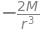

In [21]:
weyl[0,1,0,1]

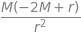

In [22]:
weyl[0,2,0,2]

(t, r, theta, phi, M)


Text(0.5, 1.0, 'T_01')

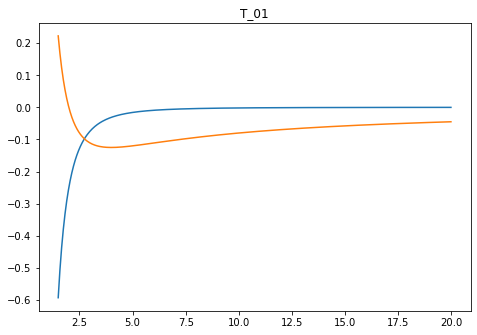

In [23]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


